In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 17:45:19 2017

@author: matt
"""
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import numpy as np
import scipy
import random
import copy
#import pyvcf


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from itertools import izip as zip, count # izip for maximum efficiency

rowCount=0
with open('/home/matt/genotype_report_080817.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if rowCount==0:
            alldata = []                                   
            colVals=row
            #find when assays start
            indexAssaystart1=row.index('C__25986767_70')
            #find when SNPs start
            indexSNPstart1=row.index('rs5030865')
            indexAssaystart2=row.index('C__26544178_30')
            indexSNPstart2=row.index('CYP2C19*10/680C>T')
            indexCNVstart=row.index('Hs04502391_cn')
        else:
            alldata.append(row)
        colCount=len(row)
        rowCount=rowCount+1
 

    #sort column values for easy comparison
labelSorted=sorted(colVals)        
diagCodes=np.zeros((rowCount,indexAssaystart1))
genoCodes=np.zeros((rowCount,len(colVals)-indexAssaystart1))
genoCodesData=np.zeros((rowCount,len(colVals)-indexAssaystart1))

# could fix and make more efficient to fill diagCodes
# diagCodes=[all(tuple) for tuple in zip(*alldata)]

#transpose list to easily access column data   
categoryData=map(list, zip(*alldata))

#get unique elements of each column
els=[]
for test in categoryData:
    els.append(list(set(test)))
    
alldata_copy=copy.deepcopy(alldata)

rowNum=0
for row in alldata:                    
    colNum=0
    for col in row[0:indexAssaystart1-1]:
        if col=='TRUE':
            diagCodes[rowNum,colNum]=int(col == 'TRUE')
#         if colNum==0:
#             diagCodes[rowNum,colNum]=col
        colNum=colNum+1
        
    colNum=indexAssaystart1
    for col in row[indexAssaystart1:]:
        if col=='none':
            genoCodes[rowNum,colNum-indexAssaystart1]=0
            alldata_copy[rowNum][colNum]=''
        else:
            genoCodes[rowNum,colNum-indexAssaystart1]=1
            elnum=1
            for el in els[colNum]:
                if col==el:
                    genoCodesData[rowNum,colNum-indexAssaystart1]=elnum
                    check=['UND','N/A','INV']
                    if col in check:
                        genoCodesData[rowNum,colNum-indexAssaystart1]=0
                        genoCodes[rowNum,colNum-indexAssaystart1]=0
                        alldata_copy[rowNum][colNum]=''
                elnum=elnum+1
        try:
            ind=els[colNum].index('none')
            els[colNum][ind]=['']
        except:
            pass
        
        colNum=colNum+1
    rowNum=rowNum+1
    
    

['M54.17', 'E55.9', 'E78.0', 'F41.9', 'R53.83', 'M54.5', 'E78.2', 'F32.9', 'F14.10', 'Z79.891', 'F11.120', 'F10.10', 'E78.5', 'E03.9', 'F11.10', 'K21.9', 'F15.20', 'E11.9', 'F41.1', 'Z13.79', 'A59.00', 'F13.20', 'F11.20', '', 'B37.3', 'Z11.3', 'I10', 'N76.0', 'Z79.899', 'T50.905A']


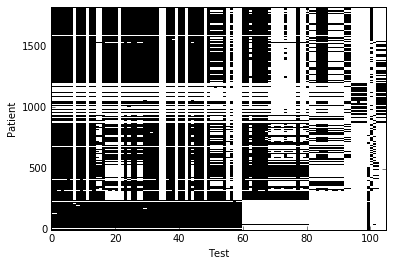

In [26]:
#looking at diagnosis codes

commonCodes=[]
commonCodeinds=np.where(sum(diagCodes)>50)[0]
commonCodeinds_sorted=sorted(range(len(commonCodeinds)), key=sum(diagCodes)[commonCodeinds].__getitem__)
for i in commonCodeinds_sorted:
    commonCodes.append(colVals[commonCodeinds[i]])
print commonCodes


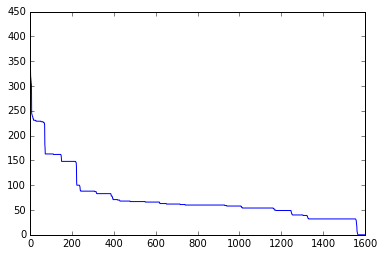

In [4]:
# getcol=genoCodes[0:,colInd] #rewrite indexing with this logic. anywhere "map" shows up. JFC
# getcolsandrows=genoCodes[np.ix_(rowInds,colInds)]
npt=[]
for i in range(0,1600):
    npt.append(len(np.where(sum(genoCodes)>i)[0]))
    
plt.plot(range(0,1600),npt)
plt.show()


In [5]:
drugCodes=[colVals.index('T50.905A'),colVals.index('Z79.899'),colVals.index('F11.20'),colVals.index('F13.20'),
           colVals.index('F15.20')]
chromAbnormalityCode=colVals.index('Z13.79')
healthCodes=[colVals.index('E11.9'),colVals.index('I10')]
STDCodes=[colVals.index('B37.3'),colVals.index('N76.0'),colVals.index('A59.00'),colVals.index('Z11.3')]
unkCodes=[colVals.index('')]

drugICDs=[colVals[i] for i in drugCodes]
chromICDs=colVals[chromAbnormalityCode]
STDICDs=[colVals[i] for i in STDCodes]
healthICDs=[colVals[i] for i in healthCodes]
unkICDs=[colVals[i] for i in unkCodes]
#in reverse order with >50 diagnoses, so last is most common
commonDiags=['Radiculopathy','Vitamin D deficiency','Hypercholesterolemia','Anxiety disorder','Fatigue','Low back pain',
             'Mixed hyperlipidemia','Depressive disorder episode','Cocaine abuse','Long term opioid use',
             'Opioid abuse with intoxication','Alcohol abuse','Hyperlipidemia NOS','Hypothyroidism','Opioid abuse',
             'Esophageal reflux','Stimulant dependence','Diabetes','Anxiety','Chromosomal anomaly','Trichomoniasis',
             'Sedative dependence','Opioid dependence','','Candidiasis','STD screening','Hypertension',
             'Vaginitis','Long-term drug therapy','Adverse effect of drugs or medication']
groupNames=['pain/opioid','std','psychiatric','alcohol','stimulant/cocaine','weight-related','back pain','other']

diagGroups=[6,7,5,2,7,6,5,2,4,0,0,3,5,5,0,7,4,5,2,7,1,0,0,7,1,1,5,1,0,0]
codeColumn=[colVals.index(i) for i in commonCodes]
diagDict={'Diagnosis':commonDiags,'Code':commonCodes,'Group': diagGroups,'GroupNames': groupNames,'CodeColumn':codeColumn}

# fig, ax = plt.subplots()
# plt.plot(range(1,len(commonCodeinds)+1),sum(diagCodes[1:])[commonCodeinds[commonCodeinds_sorted]])
# plt.xticks(range(5,len(commonCodeinds)+1,5))
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
# # ax.set_xticklabels([commonDiags[i-1] for i in range(5,len(commonCodeinds)+1,5)])

# plt.title('number of patients per diagnosis')
# plt.show()
# plt.savefig("test.eps", format="eps")
# #categorize each patient by its group name


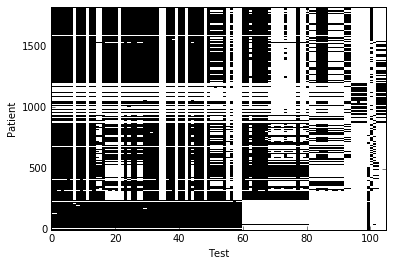

In [29]:
## select group number and filter data
%matplotlib inline
import matplotlib.pyplot as plt 

# use all patients
groupPts=range(len(alldata)+1)
#select data for each desired patient
groupPtData=[genoCodesData[i] for i in(groupPts)]

#how many patients had each test
ptThreshold=222 #automate this somehow? 222=compact subset w/>100 tests/pt, 1560=more sparse, >20 tests/pt
useTests=np.where(sum(genoCodes)>ptThreshold)[0]
#only use patients with any of these tests done
usePts=np.where([sum(i[useTests]) for i in groupPtData])[0]

#indices of patients to use, relative to original dataframe
usePtInds=[groupPts[i] for i in usePts]

#select tests and patients to use
categoryData=map(list, zip(*[alldata_copy[i] for i in usePtInds]))

#get unique elements of each column again after subselecting and removing
els=[]
testind=0
testResultLabels=[]
sparseData=[]
for test in [categoryData[indexAssaystart1+i] for i in useTests]:
    results=list(set(test))
    results.sort()
    els.append(results)
    for label in results:
        if label=='':
            continue
#         elif label in ['1','2','3','4','5','6','7','8','9','10']:
#             #copy number variation, so use actual numbers
#             testResultLabels.append(colVals[indexAssaystart1+useTests[testind]]+'['+label+']')
        else:
            testResultLabels.append(colVals[indexAssaystart1+useTests[testind]]+'['+label+']')
    testind=testind+1
    
#manual one hot encoding: whoops!
testResultData=np.zeros([len(test),len(testResultLabels)])
colInd=0
testind=0
for test in [categoryData[indexAssaystart1+i] for i in useTests]:
    results=list(set(test))
    #remove labels of ''
    results.sort()
    emptInd=results.index('')
    del results[emptInd]
    
    for label in results:
        ptInds=np.where([i==label for i in test])[0]
        for i in ptInds: testResultData[i,colInd]=1
        colInd=colInd+1
    testind=testind+1    
    
    
# groupPtDataUse=[]
# for pt in usePtInds:
#     row=alldata_copy[pt]
#     dataval=[]
#     for col in useTests:
#         dataval.append(list(els[col+1111]).index(row[col+1111]))
#     groupPtDataUse.append(dataval)
        
#separate by specific diagnosis    
# groupPtDiagUse=diagCodes[np.ix_(usePtInds,codeInds)]

# fig, ax = plt.subplots()
# plt.pcolor(groupPtDiagUse)
# ax.set_xticklabels(sum(groupPtDiagUse))
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')

# sum(groupPtDiagUse)
# plt.show()

# test=categoryData[indexAssaystart1+useTests[0]]
plt.pcolor(genoCodes[usePtInds].T[useTests].T,cmap='Greys',vmin=0,vmax=1)
plt.xlim([0.0, len(useTests)])
plt.ylim([0.0, len(usePtInds)])
xlo=plt.xlabel('Test')
ylo=plt.ylabel('Patient')
plt.savefig("data222p.png", format="png")
plt.show()


ValueError: could not convert string to float: FALSE

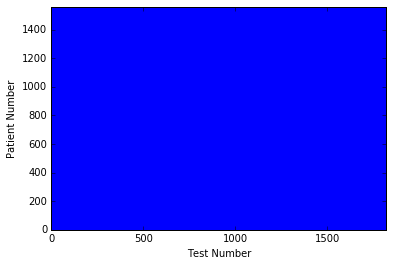

In [19]:
cax=plt.subplot(111)
plt.pcolor(categoryData,cmap='RdBu',vmin=0,vmax=12)
plt.xlim([0.0, len(categoryData[0])])
plt.ylim([0.0, len(categoryData)])
xlo=plt.xlabel('Test Number')
ylo=plt.ylabel('Patient Number')
# plt.setp(xlo,color='w')
# plt.setp(ylo,color='w')
# axes_obj = plt.getp(cax,'axes')                        #get the axes' property handler
# plt.setp(plt.getp(axes_obj, 'yticklabels'), color='w') #set yticklabels color
# plt.setp(plt.getp(axes_obj, 'xticklabels'), color='w') #set xticklabels color 
plt.savefig("datacategory.png", format="png")
# 

[2 5 5 ..., 5 5 2]


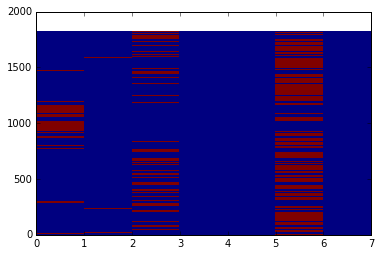

[array([''], 
       dtype='|S5'), array(['A/A'], 
       dtype='|S5'), array(['A/G'], 
       dtype='|S5'), array(['C/C'], 
       dtype='|S5'), array(['G'], 
       dtype='|S5'), array(['G/G'], 
       dtype='|S5'), array(['NOAMP'], 
       dtype='|S5')]

In [296]:
#sklearn one hot encoding
%matplotlib inline
import matplotlib.pyplot as plt 
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = categoryData[indexAssaystart1+useTests[0]]
values = array(data)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)  
inverted=[]
featInd=0
for feat in onehot_encoded.T:
    label=label_encoder.inverse_transform([argmax(onehot_encoded[np.where(feat==1)[0][0], :])])
    
    inverted.append(label)
    featInd=featInd+1
plt.pcolor(testResultData,cmap='Greys',vmin=0,vmax=1)
plt.xlim([0.0, len(testResultData[0])])
plt.ylim([0.0, len(testResultData)])
xlo=plt.xlabel('Test')
ylo=plt.ylabel('Patient')
plt.savefig("onehot.png", format="png")
inverted

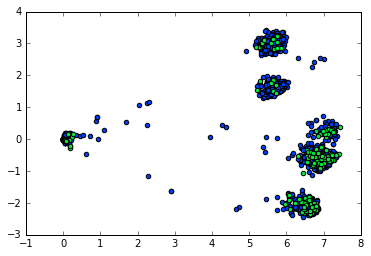

In [297]:
#restrict tests
#doesn't cluster convincingly for either group of pts with the same tests done, for any cardiovascular-related diagnosis
# numTestsUse=range(75,138)
# ptsRestrict=range(0,50)
# numTestsUse=range(0,60)
# ptsRestrict=range(60,204)
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import time
#use all patients
numTestsUse=range(0,len(testResultData[0]))
ptsRestrict=range(0,len(testResultData))

groupPtDataUse_restrict=[testResultData[i] for i in ptsRestrict]
for j in range(len(groupPtDataUse_restrict)):
    temp=groupPtDataUse_restrict[j]
    groupPtDataUse_restrict[j]=([temp[i] for i in numTestsUse])

groupPtDiagUse_restrict=groupPtDiagUse[ptsRestrict]
#try truncated SVD on data

X=groupPtDataUse_restrict

# for d in range(len(groupPtDiagUse_restrict[0])): #for different subsets of diagnosis
for d in range(1): #only for between diagnosis or no diagnosis
    X_comps = TruncatedSVD(n_components=3).fit_transform(X)

    palette = np.array(sns.color_palette('bright',2))
    fig = plt.figure()
    
    #for 2d
    ax = plt.subplot()
    #for 3d
#     ax = fig.add_subplot(111, projection='3d')
    labels=['0','1']
    for i in range(2):
        ptInds=np.where(catPtDiagUse==i)[0]
#         ptInds=np.where([pt==i for pt in groupPtDiagUse_restrict[0:,d]])[0]

        xdata = X_comps[ptInds,0]
        ydata = X_comps[ptInds,1]
        zdata = X_comps[ptInds,2]

        c_select = palette[i]
        #for 2d
        ax.scatter(xdata,ydata,c=c_select,label=labels[i])

        #for 3d
#         ax.scatter(xdata,ydata,zdata,c=c_select,label=labels[i])
#     ax.legend(bbox_to_anchor=(1.55, 0.97))
    plt.show()
#     time.sleep(5.5)    # pause 5.5 seconds



In [152]:
np.asarray(groupPtDataUse_restrict)

array([[4, 4, 0, ..., 1, 0, 0],
       [5, 4, 0, ..., 1, 0, 0],
       [5, 4, 0, ..., 1, 0, 0],
       ..., 
       [1, 1, 5, ..., 4, 3, 1],
       [1, 1, 3, ..., 0, 3, 1],
       [1, 1, 3, ..., 0, 2, 5]])

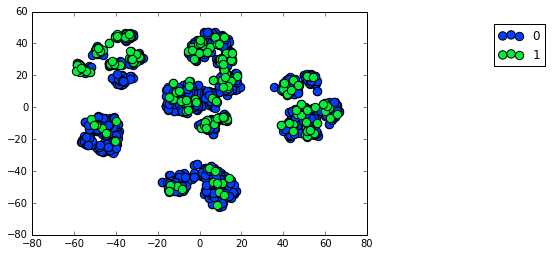

In [265]:
#try TSNE 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

X=groupPtDataUse_restrict


X_tsne = TSNE(metric='euclidean',n_components=2).fit_transform(X)
groupPtDiags=map(list,zip(*groupPtDiagUse))


palette = np.array(sns.color_palette('bright',len(groupPtDiags)+2))
fig_lle = plt.figure(figsize=(10,10))

fig = plt.figure()
ax = plt.subplot()#(aspect='equal')

#for separate diagnosis in group
# commonDiags[groupCodeInds
# for groupInd in range(len(groupPtDiags)):
#     ptInds=np.where([pt==1 for pt in groupPtDiagUse_restrict[0:,groupInd]])[0]
#for classification
labels=['0','1']
for groupInd in range(2):
    ptInds=np.where(catPtDiagUse==groupInd)[0]
    
    xdata = X_tsne[ptInds,0]
    ydata = X_tsne[ptInds,1]
    c_select = palette[groupInd]
#     for separate diags
#     ax.scatter(xdata,ydata,c=c_select,s=70,label=commonDiags[groupCodeInds[groupInd]])
#for classification
    ax.scatter(xdata,ydata,c=c_select,s=70,label=labels[groupInd])
ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()




In [300]:
# check with treeinterpreter how random forest is doing
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#for separate diags
# groupPtDiags=map(list,zip(*groupPtDiagUse))

# rf = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
#                            warm_start=False)

#for classification
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                            warm_start=False, class_weight=None)
# diagPredict=0
# rf.fit(groupPtDataUse,groupPtDiags[diagPredict])

groupPtDiagUse=diagCodes[usePtInds]

# for 
rf.fit(groupPtDataUse,catPtDiagUse)
rf.decision_path(groupPtDataUse)
featurenames=[colVals[i+1111] for i in [useTests[j] for j in numTestsUse]]
# impFeats=np.where(rf.feature_importances_>0.05)[0]
plt.plot(rf.feature_importances_)
plt.show()


# # instances=np.asarray(groupPtDataUse[pt1])
# usedata=np.asarray(groupPtDataUse)
# instances=usedata[[75,250,300]]

# prediction, bias, contributions = ti.predict(rf, instances) 
# featurenames=[colVals[i+1111] for i in [useTests[j] for j in numTestsUse]]
# print featurenames
# for i in range(len(instances)):
#     print "Instance", i
#     print "Bias (trainset mean)", bias[i]
#     print "Feature contributions:"
#     for c, feature in sorted(zip(contributions[i], featurenames), key=lambda x: -abs(x[0]))[0:10]:
#         print feature, round(c, 2)
#         print "-"*20 

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#lasso
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeavePOut

#classify: in diagnosis group or not
groupNum=5
groupCodeInds=np.where([i==groupNum for i in diagGroups])[0]
[diagDict['Diagnosis'][i] for i in groupCodeInds]
#in group or not
codeInds=[diagDict['CodeColumn'][i] for i in groupCodeInds]

#separate only patients in a specific group
# groupPts=np.where(sepPts)[0]

#first checking for each of the major diagnoses
diagCodes_use=diagCodes[usePtInds]

for codeInd in commonCodeinds:
    catPtDiagUse=np.zeros(len(diagCodes_use))
    catPtDiagUse[np.where(diagCodes_use.T[codeInd])[0]]=1
    
    X=testResultData
    Y=catPtDiagUse
    lpo = LeavePOut(len(X)*2//10)
    lpo.get_n_splits(X)

    for train_index, test_index in lpo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        reg = linear_model.Lasso
        reg.fit(X_train,Y_train)
        Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,
              selection='cyclic', tol=0.0001, warm_start=False)
        Y_preds=reg.predict(X[test_index])
        fpr[codeInd], tpr[codeInd], _ = roc_curve(Y_test, Y_preds)
        roc_auc[codeInd] = auc(fpr[codeInd], tpr[codeInd])
        
plt.figure()
lw = 2
ind=(roc_auc.index(max(roc_auc)))
plt.plot(fpr[ind], tpr[ind], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

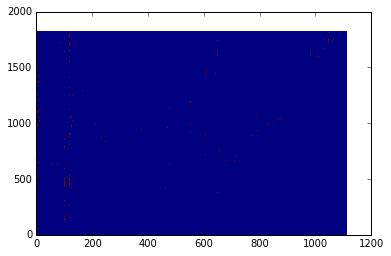

In [310]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


X = testResultData[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']